In [1]:
# %%
import os
import sys
import time
import warnings

sys.path.append(os.path.dirname(os.getcwd()))
warnings.filterwarnings("ignore")


In [2]:
# %%
import matplotlib.pyplot as plt
import numpy as np
import geomstats.visualization as visualization
import geomstats.backend as gs
from geomstats.geometry.pullback_metric import PullbackMetric
from geomstats.learning.knn import KNearestNeighborsClassifier
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.geometry.special_orthogonal import SpecialOrthogonal
from geomstats.learning.preprocessing import ToTangentSpace
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from geomstats.geometry.hypersphere import Hypersphere
import geomstats.visualization as viz
from utils import *

np.random.seed(1)
gs.random.seed(1000)


INFO: Using numpy backend


In [3]:

sphere = Hypersphere(dim=2)
metric = sphere.metric

point = np.array([-0.65726771, -0.02678122, 0.7531812])
vector = np.array([1, 0, 0.8])

tangent_vector = sphere.to_tangent(vector, base_point=point)

result = sphere.metric.geodesic(initial_tangent_vec=tangent_vector, initial_point=point)
n_samples = 100

points_on_geodesic = result(np.linspace(0.0, 1.0, n_samples))

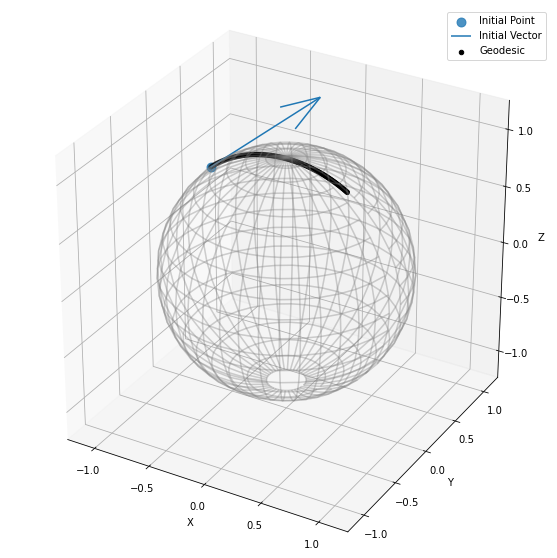

In [4]:
fig = plt.figure(figsize=(10, 10)); ax = fig.add_subplot(111, projection="3d")

ax = viz.plot(point, ax=ax, space="S2", s=80, alpha=0.8, label="Initial Point")
arrow = viz.Arrow3D(point, vector=tangent_vector); arrow.draw(ax, color="C0", label="Initial Vector")
ax = viz.plot(points_on_geodesic, ax=ax, space="S2", color="black", label="Geodesic")

ax.legend();

In [5]:

# %%
# DIMENSIONALITY REDUCTION
# Local linear embedding
#
# 1. Find k-NN according to Euclidian distance
# 2. Find weight matrix
# 3. Find y vectors

data = points_on_geodesic


In [6]:
from sklearn.cluster import KMeans
n_neighbors = 12  # neighborhood which is used to recover the locally linear structure
n_components = 2  # number of coordinates for the manifold

kmeans = KMeans( 1)
kmeans.fit(data)
labels = kmeans.predict(data)

k_nearest_vals = Compute_neighbours(data, labels, metric, n_neighbors)

K-nearest values of each point:
[[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 1  2  0  3  4  5  6  7  8  9 10 11]
 [ 2  3  1  4  0  5  6  7  8  9 10 11]]


In [7]:
M, W = Compute_W(data, metric ,k_nearest_vals, n_samples, n_neighbors )

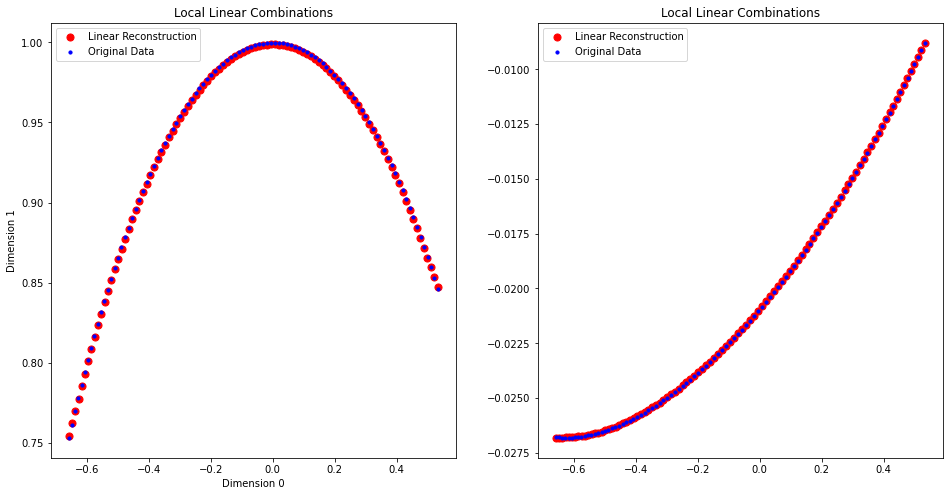

In [8]:
Validate_W(data, W, k_nearest_vals)

In [9]:
embedding, _  = null_space(M,2)
result = embedding

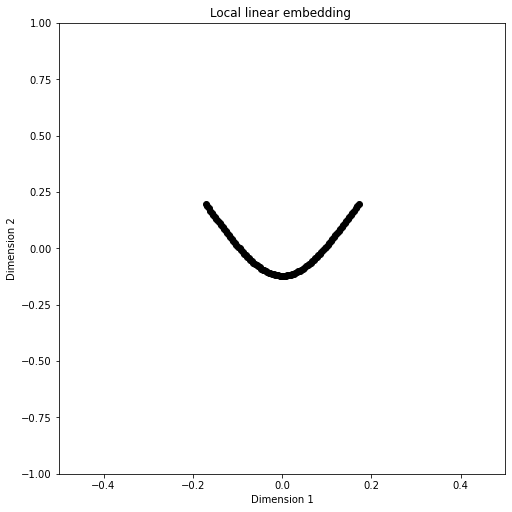

In [10]:

fig, axs = plt.subplots(
    nrows=1, ncols=1, figsize=(7, 7), facecolor="white", constrained_layout=True
)


axs.scatter(result[:,0], result[:,1],c='black')
axs.set_title('Local linear embedding ')
axs.set_xlabel('Dimension 1')
axs.set_ylabel('Dimension 2')
axs.set_xlim([-0.5,0.5])
axs.set_ylim([-1,1])
plt.show()

In [ ]:
# Test on toy dataset

from sklearn import manifold, datasets

rng = np.random.RandomState(0)

n_samples = 200
S_points, S_color = datasets.make_s_curve(n_samples, random_state=rng)

plot_3d(S_points, S_color, "Original S-curve samples")

In [ ]:
n_neighbors = 12  # neighborhood which is used to recover the locally linear structure
n_components = 2  # number of coordinates for the manifold

In [ ]:
from geomstats.geometry.euclidean import Euclidean

coords = Euclidean(dim=3)
metric = coords.metric

from sklearn.cluster import KMeans

data = S_points
kmeans = KMeans( 1)
kmeans.fit(data)
labels = kmeans.predict(data)

k_nearest_vals = Compute_neighbours(data, labels, metric, n_neighbors)

In [ ]:
# Compute W
from utils import *
M = Compute_W(data, metric ,k_nearest_vals, n_samples, n_neighbors )

In [ ]:
embedding, _  = null_space(M,2)
result = embedding

In [ ]:
plot_2d(result, S_color, 'LLE')

In [ ]:
# Find y vectors
from scipy.optimize import minimize
np.random.seed(10)
n_dimensions = 3
Y0 = np.random.rand(n_samples, n_dimensions)

def objective_function(Y):
    Y = np.reshape(Y,(n_samples, n_dimensions))
    return np.trace(np.matmul (np.matmul(Y.T , M) , Y))

def cons1(y):
    y = np.reshape(y,(n_samples, n_dimensions))
    return np.sum(y ,axis = 1)

def cons2(y):
    var = 0
    y = np.reshape(y,(n_samples, n_dimensions))
    for i in range(np.shape(y)[1]):
        y_i = y[:,i]
        var1 = y_i @ y_i.T
        var = var + var1;
    return (1/ n_samples)*var


cons = ({'type': 'eq', 'fun': cons1},
        {'type': 'eq', 'fun': cons2}
        )
    
a = objective_function(Y0)
obj = minimize( objective_function , Y0 , constraints=cons)

In [ ]:
result = obj.x
result =  np.reshape(result,(n_samples, n_dimensions))

In [ ]:

fig, axs = plt.subplots(
    nrows=1, ncols=1, figsize=(7, 7), facecolor="white", constrained_layout=True
)


axs.scatter(result[:,0], result[:,1],c='black')
axs.set_title('Local linear embedding ')
axs.set_xlabel('Dimension 1')
axs.set_ylabel('Dimension 2')
plt.show()

In [ ]:
plt.plot(result)